<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 6B </h1>
<h2> Decision Tree </h2> 
<h3> Lesson Outline </h3>

- [Decision Tree Example - Iris Dataset](#1)
- [Model Evaluation Example - Diabetes Dataset](#2)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Decision Tree Example - Iris Dataset </font> </h2></a>

### Read Dataset

In [2]:
import pandas as  pd
iris_df = pd.read_csv('../Datasets/iris-data.csv')
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Select Features

In [3]:
features = ['petal length (cm)', 'petal width (cm)']

df_x = iris_df[features]
df_y = iris_df['target name']

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=10)

### Grow Tree

Create a decision tree by using the `DecisionTreeClassifier` where your criterion is `entropy`.

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'entropy')

dtree.fit(x_train, y_train)
print(dtree.tree_.max_depth)

7


### Predict

After growing the decision tree, you can use it to predict further Iris spieces by using `.predict()`.

Note: `.predict()` only takes a DataFrame, or 2-D data structures. 

In [12]:
custom_iris = [
    # Petal Width , Petal Length
    [1.5, 2.5]
]
custom_df = pd.DataFrame(custom_iris)

display(custom_df)

dtree.predict(custom_df)
dtree.predict([[1.5, 3], [2.5, 3.5]])

,0,1
0,1.5,2.5


array(['setosa', 'virginica'], dtype=object)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Model Evaluation Example - Diabetes Dataset </font> </h2></a>

Model evaluation is important in assessing whether your model is accurate, and if it requires adjusting/tuning to get better results. 

Here we will compare two different decision trees: 

1. Full Grown Tree
2. Pruned Trees

We will use the different metrics to compare their performance, through a confusion matrix. 

In [14]:
import pandas as pd

diabetes_df = pd.read_csv('../Datasets/diabetes-500.csv')

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,141,84,26,0,32.4,0.433,22,0
1,4,83,86,19,0,29.3,0.317,34,0
2,1,128,82,17,183,27.5,0.115,22,0
3,9,112,82,32,175,34.2,0.260,36,1
4,2,71,70,27,0,28.0,0.586,22,0


### Feature Selection 

In this dataset, the outcome variable is 1, has diabetes; 0, has no diabetes. The rest of the columns will be the features for training this tree.

In [15]:
features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

df_x = diabetes_df[features]

df_y = diabetes_df['Outcome'] 

### Train Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=5)

### Full Tree

Create a full tree called `full_dia_dtree`.

In [22]:
from sklearn.tree import DecisionTreeClassifier

full_dia_dtree = DecisionTreeClassifier()

full_dia_dtree.fit(x_train, y_train)
print(full_dia_dtree.tree_.max_depth) 

14


### Pruned Tree

Create a Pruned Tree of depth `3` called, `pruned_dia_dtree`.

In [23]:
pruned_dia_dtree = DecisionTreeClassifier(max_depth = 3)

pruned_dia_dtree.fit(x_train, y_train)
print(pruned_dia_dtree) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Testing Each Tree

After each tree is trained, test them against the test data by using `.predict()` on both trees.

In [24]:
full_results = full_dia_dtree.predict(x_test)
print(full_results)

print("-----")

pruned_results = pruned_dia_dtree.predict(x_test)
print(pruned_results)

[0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1]
-----
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1]


### Create Confusion Matrix 

Create the two confusion matrices using the `sklearn.metrics.confusion_matrix` with the testing data. 

By using matplot lib, we can visualise the confusion matrices side by side for unpruned and pruned trees.

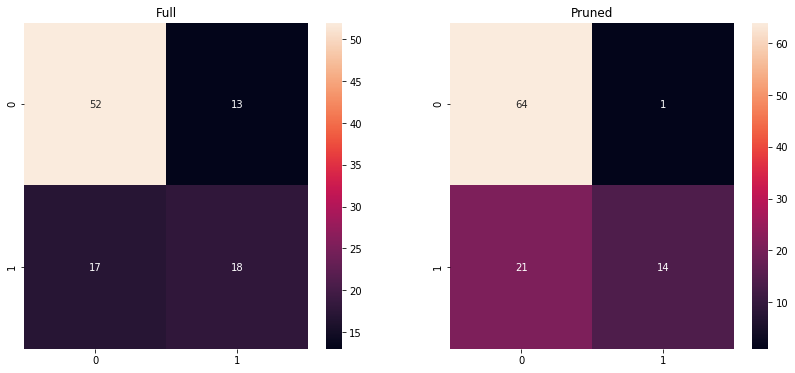

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_f = confusion_matrix(y_test, full_results)
cm_p = confusion_matrix(y_test, pruned_results)

options = {
    "annot": True
}

fig, ax = plt.subplots(ncols=2, figsize=(14,6))


sns.heatmap(cm_f, ax=ax[0], **options)
sns.heatmap(cm_p, ax=ax[1], **options)

ax[0].set_title("Full")
ax[1].set_title("Pruned")
plt.show()

### Accuracy Scores

You can compare the two trees by using `.accuracy()`, the same way you create the confusion matrix.

In [26]:
print(full_dia_dtree.score(x_test, y_test))
print(pruned_dia_dtree.score(x_test, y_test))

0.7
0.78


### Feature Importance

<BarContainer object of 7 artists>

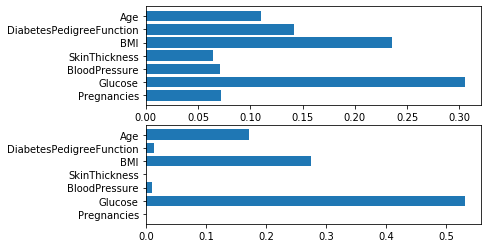

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2)

ax[0].barh(features, full_dia_dtree.feature_importances_)

ax[1].barh(features, pruned_dia_dtree.feature_importances_)